## 6.1. Introduction to NMR processing

In [1]:
#Library Imports
from spectrochempy import *
# additional useful library
import os

SpectroChemPy's API - v.0.1a5.dev5+g9796de3f.d20190111
© Copyright 2014-2019 - A.Travert & C.Fernandez @ LCS


### 6.1.1. Import data

Here we import two dataset, one is 1D and the other is 2D

Because , we will sometimes need to recall the original dataset, we create to getting functions

In [2]:
# 1D dataset getting function 
def get_dataset1D():
    dataset1D = NDDataset()
    path = os.path.join(datadir.path, 'nmrdata','bruker', 'tests', 'nmr','bruker_1d')
    dataset1D.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
    return dataset1D

# 2D dataset getting function
def get_dataset2D():
    dataset2D = NDDataset()
    path = os.path.join(datadir.path, 'nmrdata','bruker', 'tests', 'nmr','bruker_2d')
    dataset2D.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
    return dataset2D

In [3]:
# get the 1D dataset
dataset1D = get_dataset1D()
# display info
dataset1D 

NDDataset: [-1037.267-1077.841j, -2200.383-2283.510j, ...,    0.062-0.234j,   -0.053+0.101j] unitless

In [4]:
# get the 2D dataset
dataset2D = get_dataset2D()
# display info
dataset2D

NDDataset: [[(   0.062+0.224j,   -0.003+0.162j), (   0.147+0.198j,   -0.002+0.056j), ..., (   0.046+0.166j,    0.021-0.027j),
             (   0.031-0.033j,   -0.081+0.011j)],
            [(  -0.060+0.007j,   -0.057-0.134j), (  -0.088-0.028j,    0.117+0.007j), ..., (  -0.051+0.029j,    0.058+0.082j),
             (  -0.060+0.067j,   -0.003-0.005j)],
            ...,
            [(   0.000-0.000j,    0.000-0.000j), (   0.000-0.000j,    0.000-0.000j), ..., (   0.000-0.000j,    0.000-0.000j),
             (   0.000-0.000j,    0.000-0.000j)],
            [(   0.000-0.000j,    0.000-0.000j), (   0.000-0.000j,    0.000-0.000j), ..., (   0.000-0.000j,    0.000-0.000j),
             (   0.000-0.000j,    0.000-0.000j)]] unitless

### 6.1.2. Plot the 1D dataset raw data

<IPython.core.display.Javascript object>


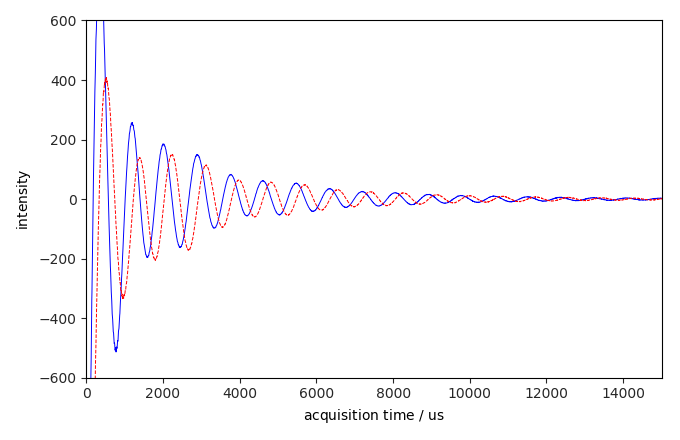

In [5]:
# restore the original dataset (useful in case of mutiple execution of part of the code, 
# to avoid unexpected cumulative processing)
dataset1D = get_dataset1D()

# plot the real data
dataset1D.plot(color='blue', xlim=(0,15000.)) 

# plot the imaginary data on the same plot
# Note that we assign the results of this function to `_` in order to avoid output such as :
# <matplotlib.axes._subplots.AxesSubplot at 0x1c1b2fbac8>
_ = dataset1D.plot(imag=True, color='red', ls='--', ylim=(-600,600), 
                   data_only=True, clear=False)

# Note the two additional flags:
# ------------------------------
# `clear=False`to plot on the previous plot (without this a new plot is created)
# `data_only =True` to plot only the additional data, without updating the figure setting 
#  such as xlim and so on, except if they are specifically indicated.

To display the imaginary part, one can also simply use the show_complex commands.

<IPython.core.display.Javascript object>


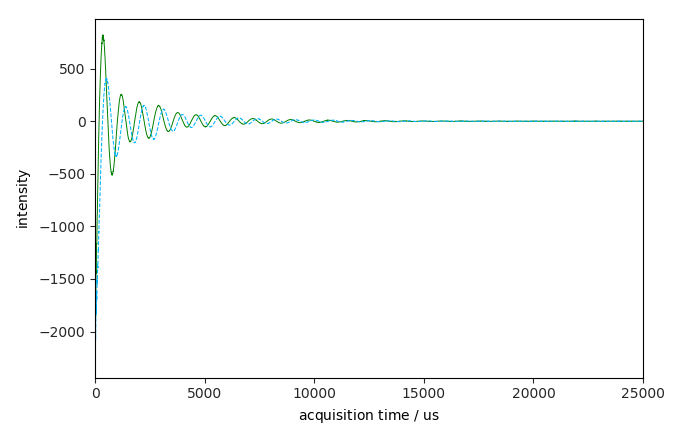

In [6]:
_ = dataset1D.plot(show_complex=True, color='green', xlim=(0.,25000.))

### 6.1.3. Plot the 2D dataset raw data

<IPython.core.display.Javascript object>


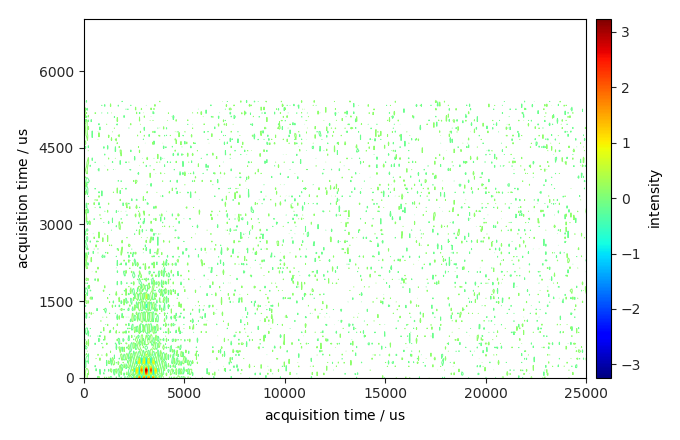

In [7]:
# restore the original dataset
dataset2D = get_dataset2D()
# plot the dataset as a contour map
_ = dataset2D.plot_map(xlim=(0.,25000.))

Multiple display are also possible for 2D dataset

<IPython.core.display.Javascript object>


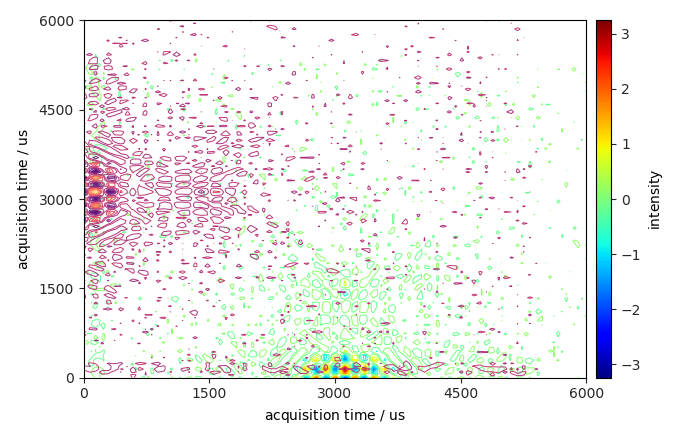

In [8]:
dataset2D.plot_map(xlim=(0.,6000.), ylim=(0.,6000.))
# here we plot the transposed dataset (dataset2D.T) on the same figure.
_ = dataset2D.T.plot_map(cmap='magma', data_only=True, clear=False)

### 6.1.4. Apodization

#### 6.1.4.1. Introduction to apodization processing

In most situation, there is two syntaxes to perform operation on the dataset.

For instance, to perform the apodization using an exponential multiplication:

1. newdataset = dataset.em(lb=...)
2. newdataset = em(dataset, lb=...)

<IPython.core.display.Javascript object>


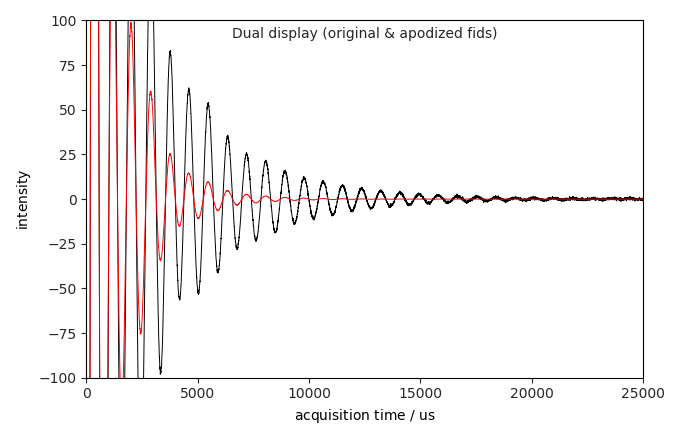

In [9]:
# tke the original dataset
dataset1D = get_dataset1D()

# plot it
dataset1D.plot() 

# Create the apodized dataset usint exponential multiplication (em)
lb_dataset = dataset1D.em(lb=100.*ur.Hz)

# plot the apodized dataset on the same figure
lb_dataset.plot(xlim=(0,25000), zlim=(-100,100), color='r', clear=False)

# add some text
_ = lb_dataset.ax.text(12500,90,'Dual display (original & apodized fids)', 
                       ha='center', fontsize=10)

Note that the apodized dataset actually replace the original data

In [10]:
# check that both dataset are the same (an error should be issued by the assert command if it is not the case)
assert lb_dataset is dataset1D  # note here, that the original data are modified by default 
                                # when applying apodization function. 

We can use the `inplace` keyword to modify this behavior

In [11]:
dataset1D = get_dataset1D()
lb_dataset = dataset1D.em(lb=100.*ur.Hz, inplace=False)
assert not lb_dataset is dataset1D

We can use of the second syntax.

In [12]:
# restore original and plot it
dataset1D = get_dataset1D() 

# Create the apodized dataset
lb2_dataset = em(dataset1D, lb=100.*ur.Hz, inplace=False)

# check that lb2_dataset and the previous lb_dataset are equal
assert lb2_dataset == lb_dataset

We can also get only the apodization function

<IPython.core.display.Javascript object>


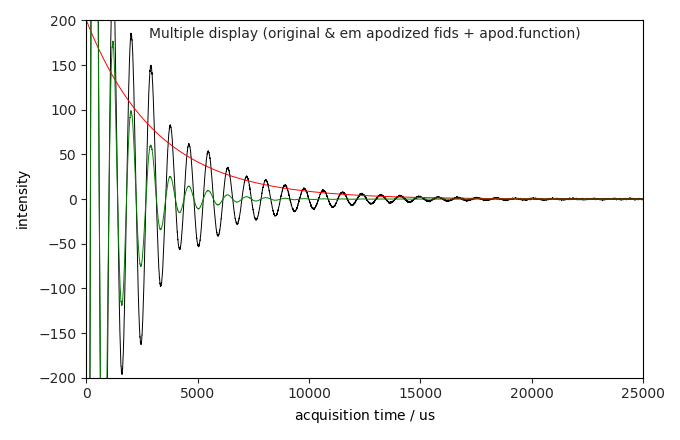

In [13]:
dataset1D = get_dataset1D()

# create the apodized dataset 
# when apply is False, the apodization function is not applied to the dataset, 
# but returned as a new dataset
apodfunc = dataset1D.em(lb=100.*ur.Hz, apply=False, inplace=False)*200
lb_dataset = dataset1D.em(lb=100.*ur.Hz, apply=True, inplace=False)

# plot the 3 datasets on the same figure 
dataset1D.plot() 
apodfunc.plot(color='r', clear=False)
lb_dataset.plot(data_only=True, xlim=(0,25000), zlim=(-200,200), color='g', clear=False) 

_ = dataset1D.ax.text(12500,180,'Multiple display (original & em apodized fids + apod.function)', ha='center', fontsize=10)

#### 6.1.4.2. available apodization functions

##### em

<IPython.core.display.Javascript object>


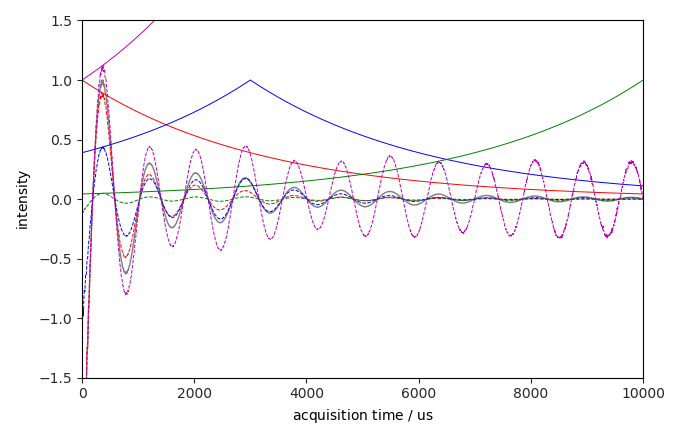

In [14]:
# restore original
dataset1D = get_dataset1D()[:10000.0]  # take a selection

# normalize amplitude
dataset1D /= dataset1D.max()

# apodize
LB = 100.*ur.Hz
apodfunc = dataset1D.em(lb=LB, apply=False)
lb_dataset = dataset1D.em(lb=LB, inplace=False) #  apply=True by default

# Plot
dataset1D.plot(lw=1, color='gray') 
apodfunc.plot(color='r', clear=False)
lb_dataset.plot(color='r', ls='--', clear=False) 

# shifted
apodfuncshifted = dataset1D.em(lb=LB, shifted=3000, apply=False)
apodfuncshifted.plot(color='b', clear=False)
lbshifted_dataset = dataset1D.em(lb=LB, shifted=3000, inplace=False) #  apply=True by default
lbshifted_dataset.plot(xlim=(0,10000), ylim=(-1,1), color='b', ls='--', clear=False) 

# rev
apodfuncrev = dataset1D.em(lb=LB, rev=True, apply=False)
apodfuncrev.plot(color='g', clear=False)
lbrev_dataset = dataset1D.em(lb=LB, rev=True, inplace=False) #  apply=True by default
lbrev_dataset.plot(ylim=(-1,1), color='g', ls='--', clear=False) 

# inv
apodfuncinv = dataset1D.em(lb=LB, inv=True, apply=False)
apodfuncinv.plot(color='m', clear=False)
lbinv_dataset = dataset1D.em(lb=LB, inv=True, inplace=False) #  apply=True by default
_ = lbinv_dataset.plot(ylim=(-1.5,1.5), color='m', ls='--', clear=False) 

##### gm

<IPython.core.display.Javascript object>


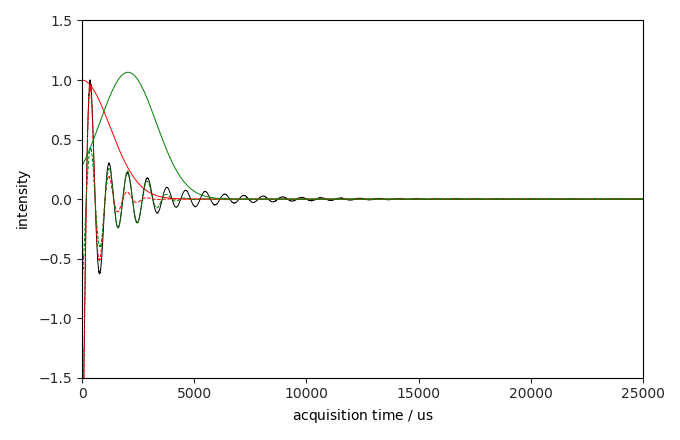

In [15]:
# restore original
dataset1D = get_dataset1D() 
dataset1D /= dataset1D.max()

# apodize
LB = -100.*ur.Hz
GB = 300.*ur.Hz
apodfunc = dataset1D.gm(gb=GB, lb=LB, apply=False)
gb_dataset = dataset1D.gm(gb=GB, lb=LB, inplace=False) #  apply=True by default

# plot 
dataset1D.plot() 
apodfunc.plot(color='r', clear=False)
_ = gb_dataset.plot(xlim=(0,25000), zlim=(-1.5,1.5), color='r', ls='--', clear=False) 

# shifted
LB = 10.*ur.Hz
GB = 300.*ur.Hz
apodfuncsh = dataset1D.gm(gb=GB, lb=LB, shifted=2000, apply=False)
gbsh_dataset = dataset1D.gm(gb=GB, lb=LB, shifted=2000, inplace=False) #  apply=True by default

# plot 
apodfuncsh.plot(color='g', clear=False)
_ = gbsh_dataset.plot(xlim=(0,25000), zlim=(-1.5,1.5), color='g', ls='--', clear=False) 

**TODO**: sp function

<IPython.core.display.Javascript object>


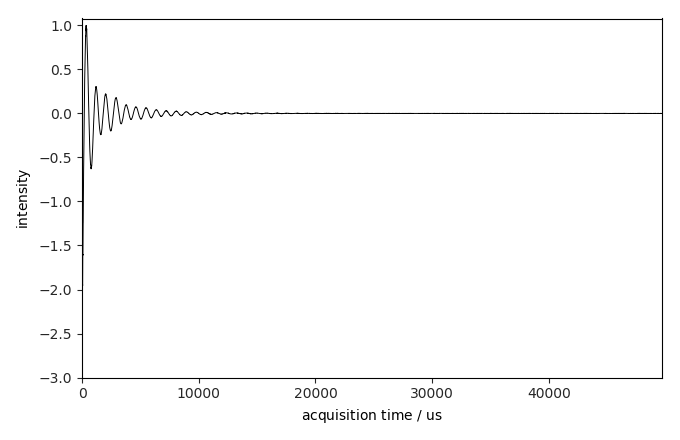

In [16]:
# Plot
dataset1D = get_dataset1D() # restore original
# normalize amplitude
dataset1D /= dataset1D.data.max()

dataset1D.plot() 

#apodfunc = dataset1D.sp(off=0, end=10., pow=1.2, apply=False)

#apodfunc.plot(color='r', clear=False)

### Apodization of 2D data

<IPython.core.display.Javascript object>


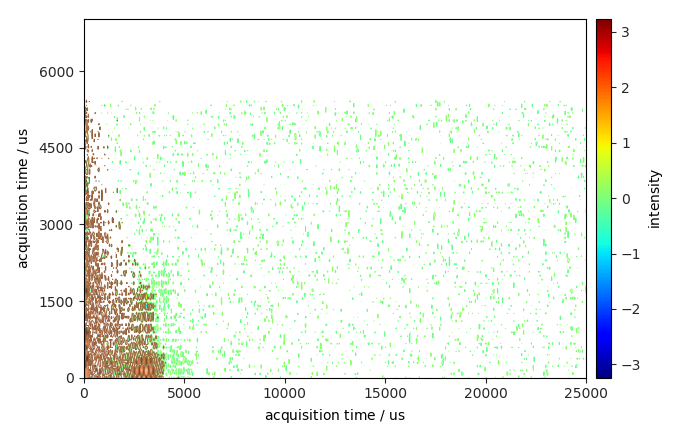

In [17]:
dataset2D = get_dataset2D()
dataset2D.plot_map(xlim=(0.,25000.))

LB = 200.*ur.Hz
dataset2D.em(lb=LB)
dataset2D.em(lb=LB/2, axis=0)  
dataset2D.plot_map(data_only=True, cmap='copper', clear=False)

## Time-frequency transforms : FFT

In [18]:
dataset1D = get_dataset1D() # restore original
LB = 10.*ur.Hz
dataset1D.em(lb=LB)
#dataset1D.zf_auto(inplace=True)
#transf1 = source1D.fft() # by defauut fft create a new dataset

NDDataset: [-1037.267-1077.841j, -2200.107-2283.223j, ...,    0.013-0.049j,   -0.011+0.021j] unitless

In [19]:
dataset1D = get_dataset1D() # restore original
LB = 10.*ur.Hz
GB = 50.*ur.Hz
dataset1D.gm(gb=GB, lb=LB)
#dataset1D.zf_auto()
#transf2 = dataset1D.fft()

NDDataset: [-1037.267-1077.841j, -2200.659-2283.796j, ...,    0.000-0.000j,   -0.000+0.000j] unitless

As the new dataset is transformed, function that apply to time data such as **em** should not work

In [20]:
#_ = transf1.em(lb=10*ur.Hz)